In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

--- 1. โหลดและเตรียมข้อมูล ---


In [ ]:
data = pd.read_csv('/content/stroke_risk_dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,18,30.0,0
69996,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,24,33.0,0
69997,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,49,45.5,0
69998,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,45,48.5,0


--- สำรวจข้อมูล (EDA) ---

1.สำรวจประเภทของข้อมูล

In [ ]:
print(data.shape)

(70000, 18)


In [ ]:
print(data.columns)

Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)',
       'At Risk (Binary)'],
      dtype='object')


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

2. ตรวจสอบ Missing Values

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/stroke_risk_dataset.csv')

#แปลง DataFrame เป็น NumPy Array
data_array = data.to_numpy()
print("--- ประเภทข้อมูล (Type) ---")
print(f"data (ดั้งเดิม): {type(data)}")
print(f"data_array (แปลงแล้ว): {type(data_array)}")

print("\n--- หน้าตาข้อมูล (Array) ---")
print(data_array)

--- ประเภทข้อมูล (Type) ---
data (ดั้งเดิม): <class 'pandas.core.frame.DataFrame'>
data_array (แปลงแล้ว): <class 'numpy.ndarray'>

--- หน้าตาข้อมูล (Array) ---
[[ 0.   1.   1.  ... 54.  58.   1. ]
 [ 0.   0.   1.  ... 49.  40.5  0. ]
 [ 1.   0.   0.  ... 62.  52.   1. ]
 ...
 [ 1.   1.   0.  ... 49.  45.5  0. ]
 [ 0.   1.   1.  ... 45.  48.5  0. ]
 [ 0.   1.   0.  ... 74.  63.   1. ]]


In [ ]:
# กรองหา NaN ใน Array 2 มิติ
nan_values = data_array[np.isnan(data_array)]

print(nan_values)

[]


In [ ]:
print("\n[1] ตรวจสอบ Missing Values (ผลรวมต่อคอลัมน์):")
print(data.isnull().sum())
print("--------------------------------\n")


[1] ตรวจสอบ Missing Values (ผลรวมต่อคอลัมน์):
Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
Stroke Risk (%)                   0
At Risk (Binary)                  0
dtype: int64
--------------------------------



3. ตรวจสอบความสมดุลของข้อมูล (Target Variable)

ดูด้วยตัวเลข

In [ ]:
import pandas as pd
data = pd.read_csv('/content/stroke_risk_dataset.csv')
target_column = 'At Risk (Binary)'

print("--- นับจำนวน (Raw Count) ---")
print(data[target_column].value_counts())

#(normalize=True จะแปลงเป็นสัดส่วน 0.0 - 1.0)
print("\n--- สัดส่วน (Percentage) ---")
print(data[target_column].value_counts(normalize=True))

--- นับจำนวน (Raw Count) ---
At Risk (Binary)
1    45444
0    24556
Name: count, dtype: int64

--- สัดส่วน (Percentage) ---
At Risk (Binary)
1    0.6492
0    0.3508
Name: proportion, dtype: float64


ดูด้วยกราฟ


--- กำลังสร้างกราฟ Countplot ---


/tmp/ipython-input-2804128565.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_column, data=data, palette='pastel')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO

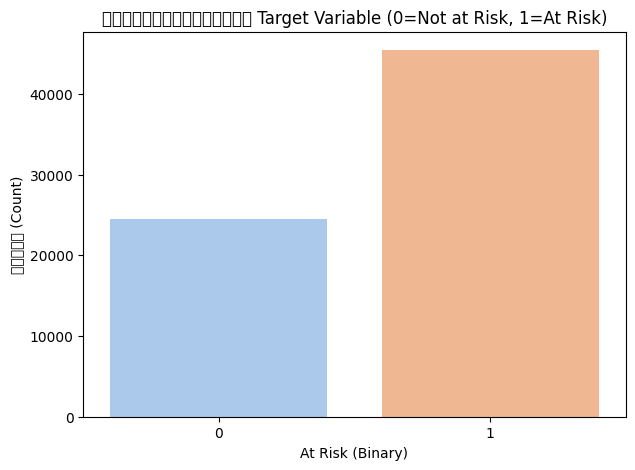

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.countplot(x=target_column, data=data, palette='pastel')
plt.title('การกระจายตัวของ Target Variable (0=Not at Risk, 1=At Risk)')
plt.xlabel('At Risk (Binary)')
plt.ylabel('จำนวน (Count)')
plt.show()

4. ดูการกระจายตัวของข้อมูล (Features)

--- กราฟ Histogram สำหรับทุก Feature ---


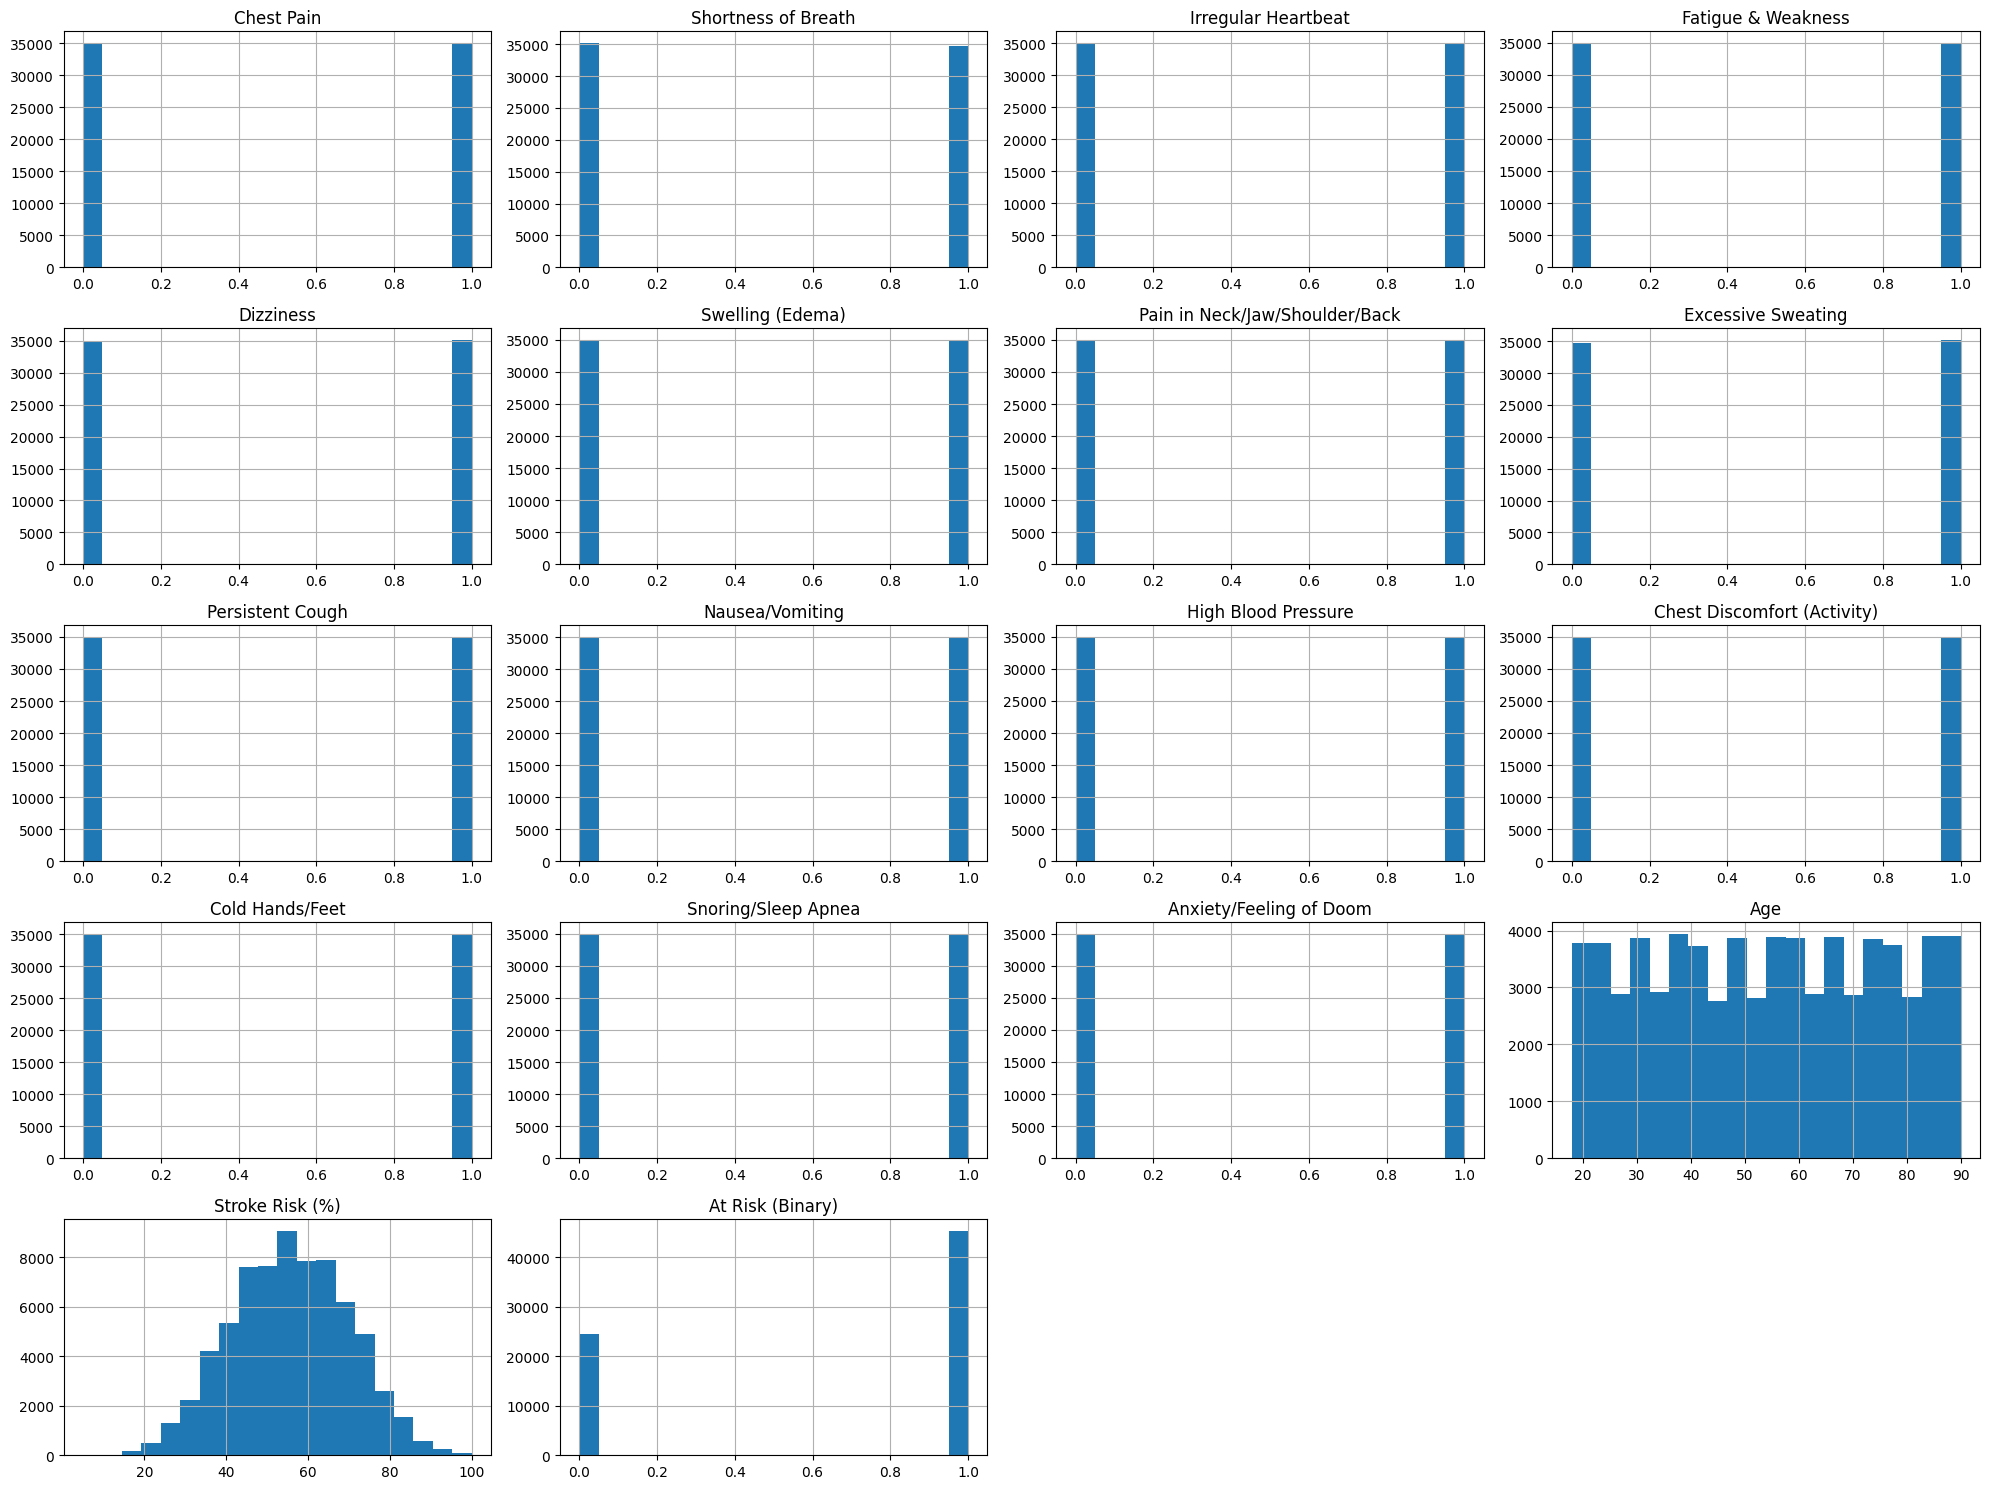

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/stroke_risk_dataset.csv')

print("--- กราฟ Histogram สำหรับทุก Feature ---")

data.hist(bins=20, figsize=(20, 15), layout=(-1, 4))
plt.tight_layout()

plt.show()

5.การตรวจหา Outliers (Outlier Detection)

--- Boxplot (เพื่อหา Outliers) ---


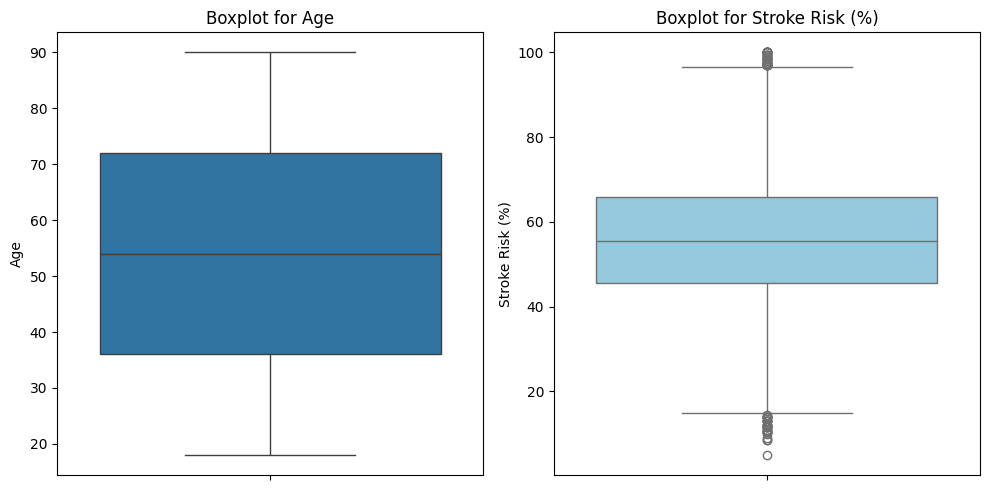

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/stroke_risk_dataset.csv')

print("--- Boxplot (เพื่อหา Outliers) ---")
plt.figure(figsize=(10, 5))

# --- กราฟที่ 1: Age ---
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Age'])
plt.title('Boxplot for Age')

# --- กราฟที่ 2: Stroke Risk (%) ---
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Stroke Risk (%)'], color='skyblue')
plt.title('Boxplot for Stroke Risk (%)')

plt.tight_layout()
plt.show()


กราฟ Grouped Boxplot (ตัวเลข vs Target)

--- Grouped Boxplot (Age vs At Risk) ---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

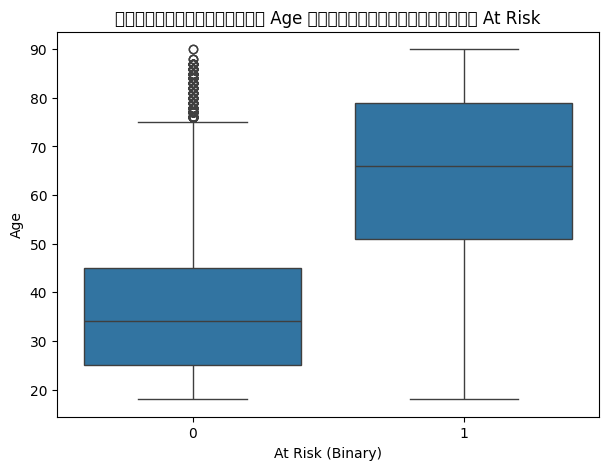

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Grouped Boxplot (Age vs At Risk) ---")
plt.figure(figsize=(7, 5))
sns.boxplot(x='At Risk (Binary)', y='Age', data=data)
plt.title('การกระจายตัวของ Age เทียบระหว่างกลุ่ม At Risk')
plt.show()

6.การวิเคราะห์ความสัมพันธ์ (Correlation Analysis)

--- Correlation Heatmap ---


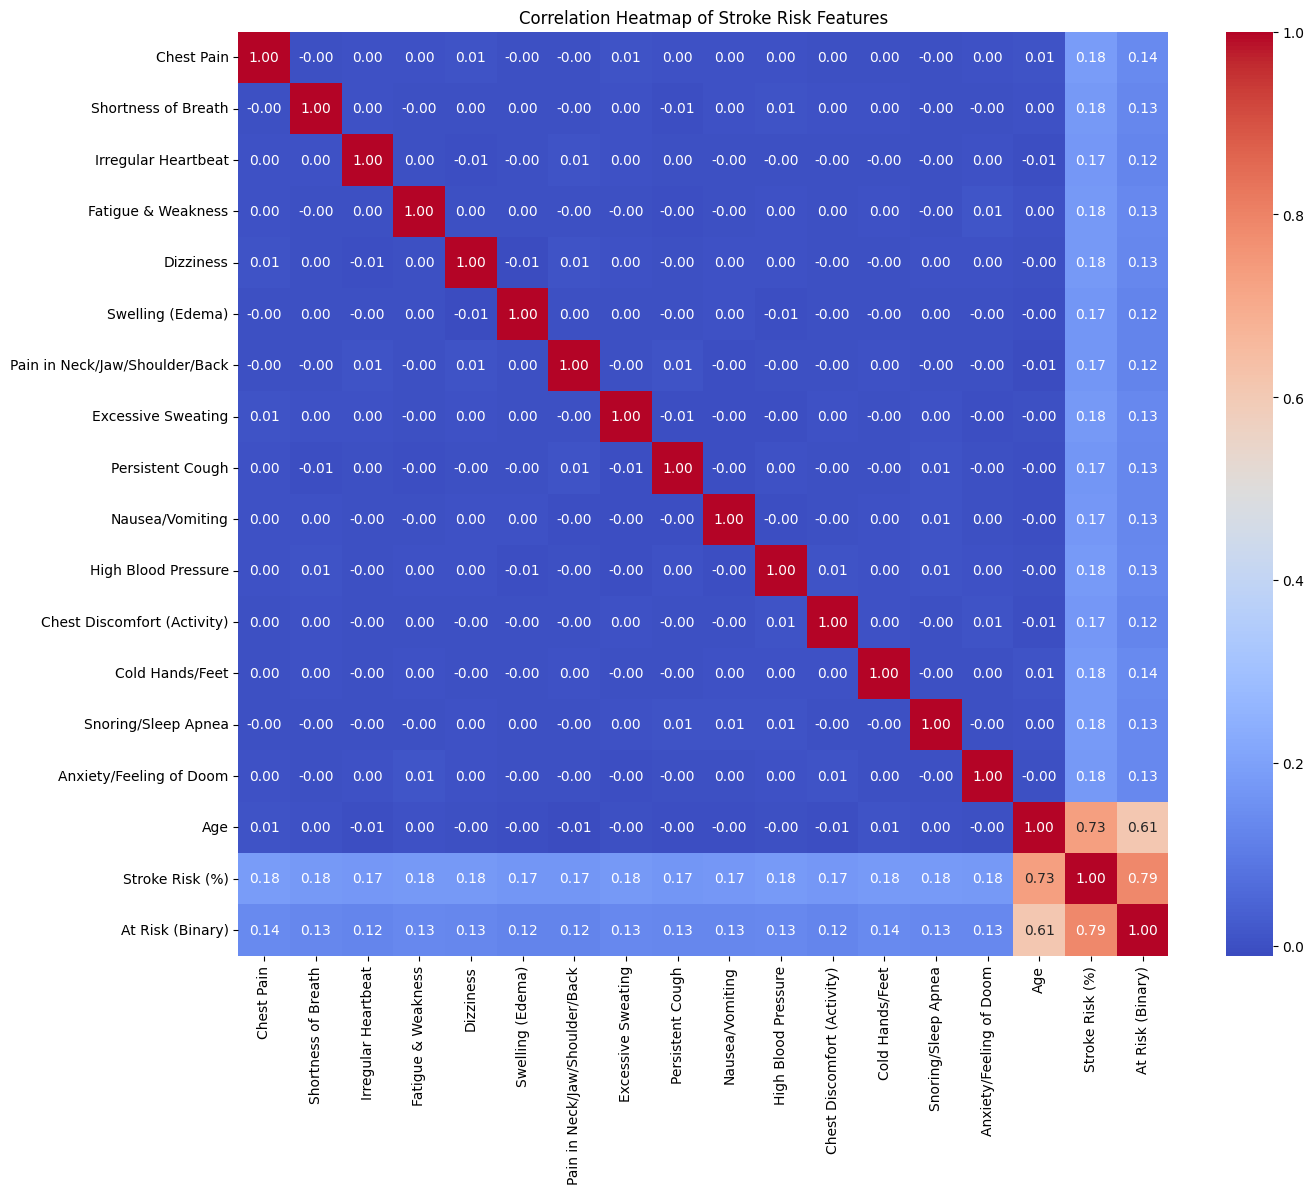

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/stroke_risk_dataset.csv')

print("--- Correlation Heatmap ---")

#คำนวณค่า Correlation Matrix
# คำสั่ง .corr() จะคำนวณความสัมพันธ์ระหว่างทุกคอลัมน์ที่เป็นตัวเลข
corr_matrix = data.corr()

# สร้างHeatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm' #ใช้โทนสีแดง-น้ำเงิน
)
plt.title('Correlation Heatmap of Stroke Risk Features')
plt.show()


กราฟ Grouped Countplot (0/1 vs Target)

--- กำลังสร้าง Grouped Countplot (สำหรับทุก Feature 0/1) ---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

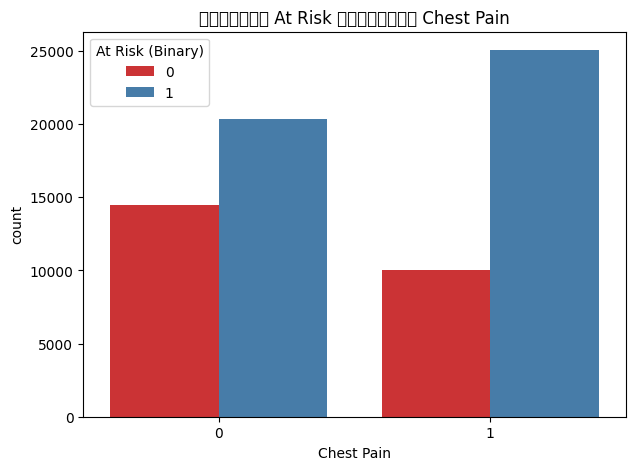

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

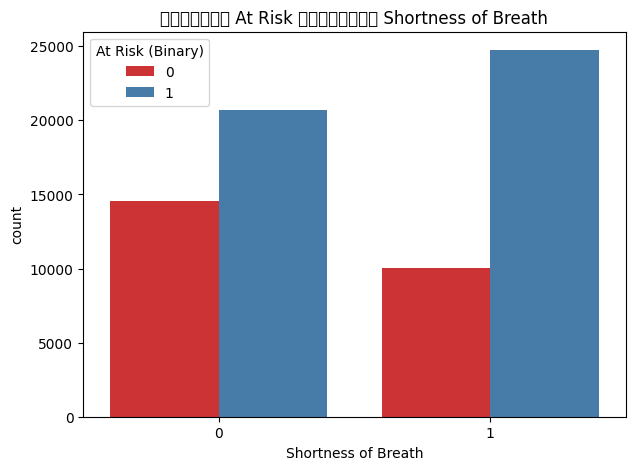

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

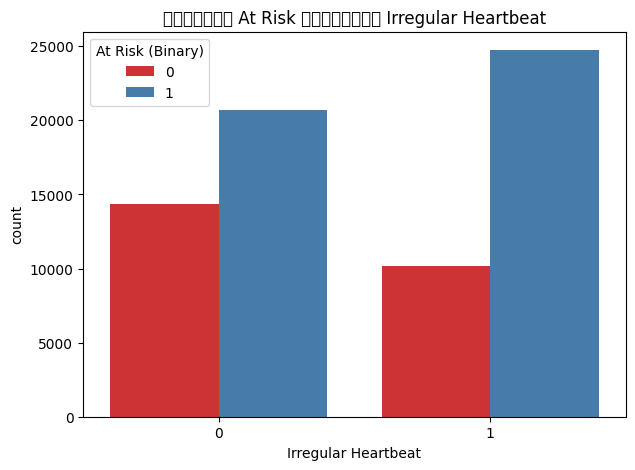

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

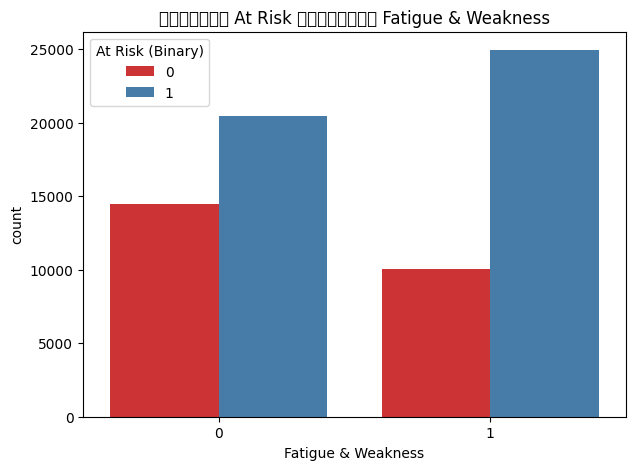

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

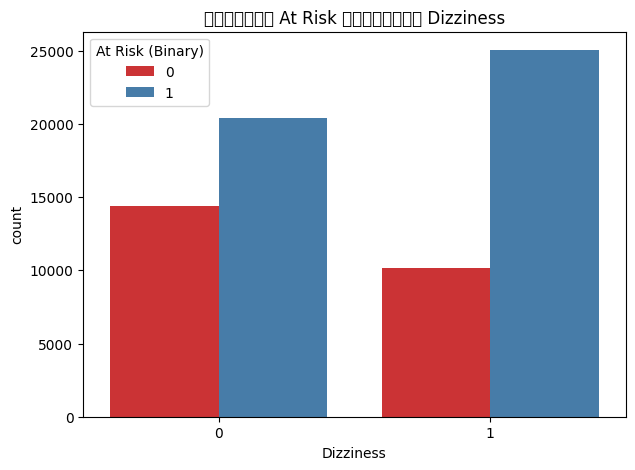

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

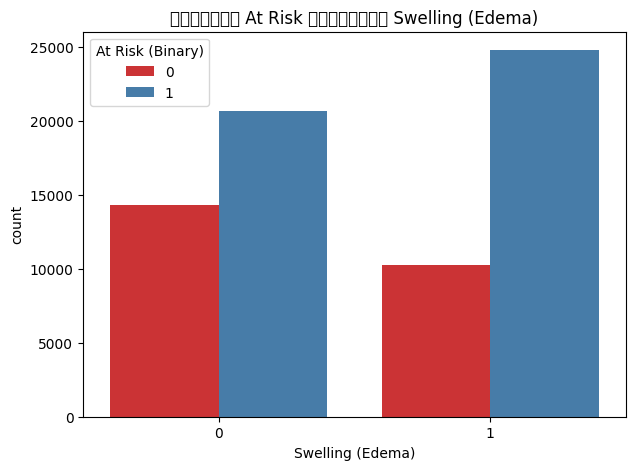

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

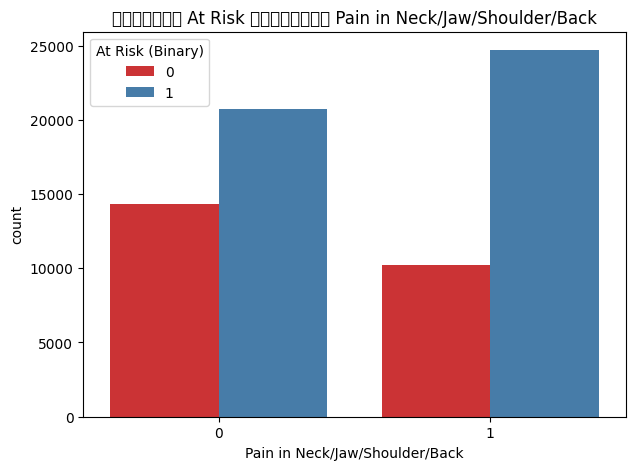

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

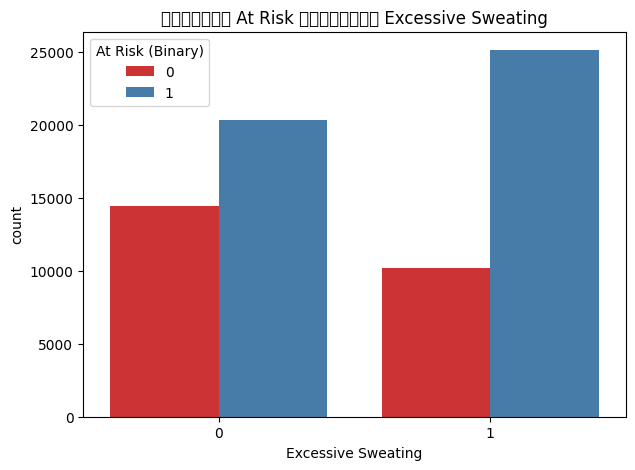

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

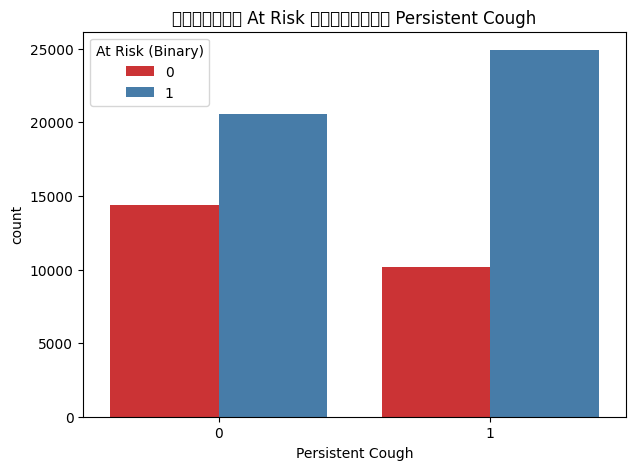

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

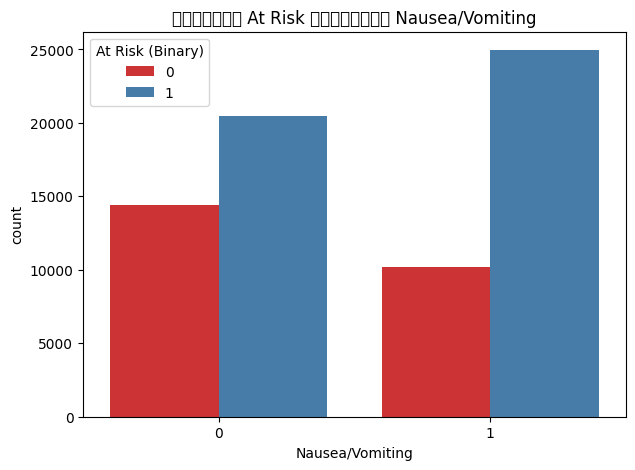

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

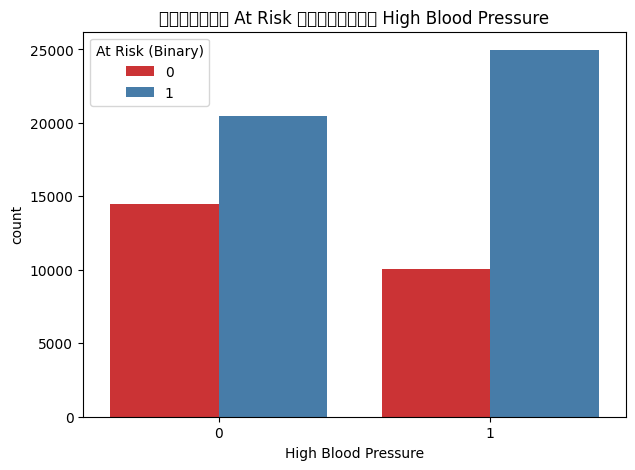

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

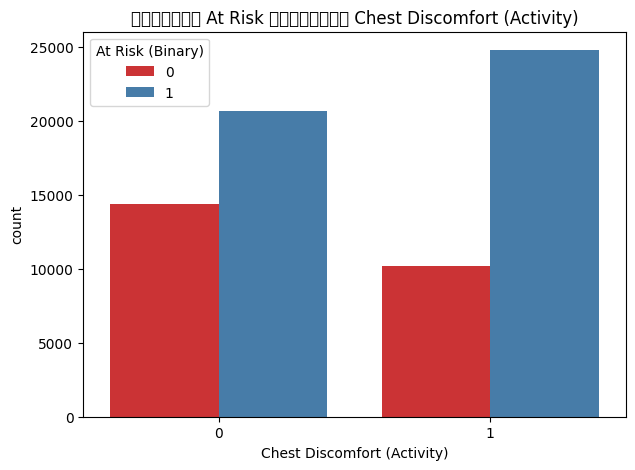

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

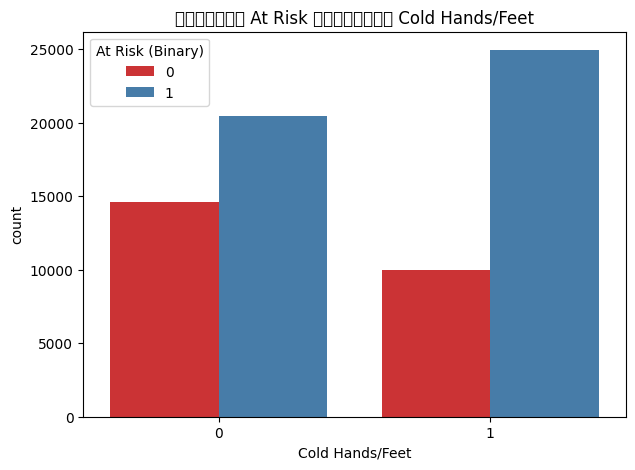

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

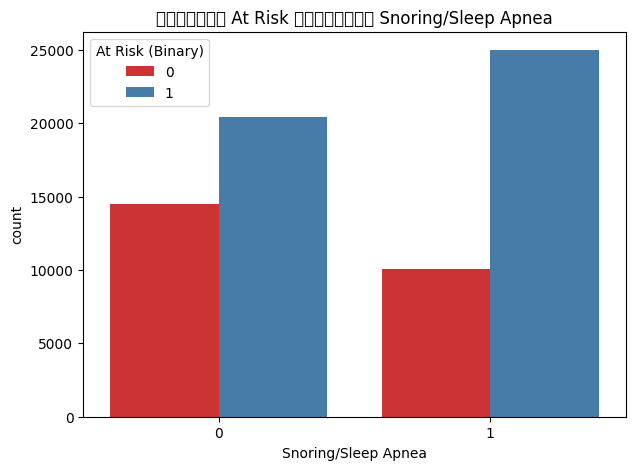

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

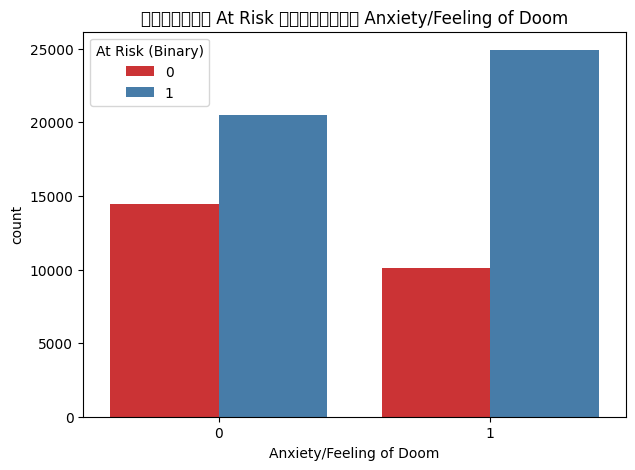

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/stroke_risk_dataset.csv')

# ระบุคอลัมน์ที่ไม่ใช่ 0/1 (เพื่อข้ามไป)
columns_to_skip = ['Age', 'Stroke Risk (%)', 'At Risk (Binary)']

# วนลูปสร้างกราฟ
print("--- กำลังสร้าง Grouped Countplot (สำหรับทุก Feature 0/1) ---")

#วนลูปในทุกคอลัมน์
for col in data.columns:

    #ถ้าคอลัมน์นั้นไม่อยู่ในลิสต์ที่ให้ข้าม
    if col not in columns_to_skip:


        plt.figure(figsize=(7, 5))
        sns.countplot(x=col, hue='At Risk (Binary)', data=data, palette='Set1')
        plt.title(f'สัดส่วน At Risk เทียบกับ {col}')
        plt.show()

Data preparation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # ต้องใช้ library นี้
data = pd.read_csv('/content/stroke_risk_dataset.csv')

print("--- Data Preparation ---")

# --- แยก X, y ---
y = data['At Risk (Binary)']
#ตัด 'Stroke Risk (%)' ออกเหมือนเดิม
X = data.drop(['At Risk (Binary)', 'Stroke Risk (%)'], axis=1)

# --- แบ่งข้อมูล Train/Test ก่อน  ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"ก่อนทำ SMOTE (Train Set): {y_train.value_counts().to_dict()}")

# ---  ทำ SMOTE (ให้เป็น 50:50) ---
smote = SMOTE(random_state=42)

# สั่งให้สร้างข้อมูลเพิ่มใน X_train, y_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"หลังทำ SMOTE (Train Set): {y_train_resampled.value_counts().to_dict()}")
print("ตอนนี้ข้อมูล Train เป็น 50:50 แล้ว!")

# --- ปรับสเกล (Standard Scaling) ---
# ใช้ข้อมูลที่ทำ SMOTE แล้ว (X_train_resampled) มาปรับสเกล
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled) # fit กับข้อมูลใหม่
X_test_scaled = scaler.transform(X_test) # transform ข้อมูล test (แบบเดิม)

# อัปเดตตัวแปรให้พร้อมเทรน (ใช้ชื่อเดิมจะได้ไม่ต้องแก้โค้ดส่วนเทรน)
X_train = X_train_resampled
y_train = y_train_resampled
# ส่วน X_train_scaled คือตัวที่เราจะเอาไปใช้กับ SVM

print("--------------------------------------------------")
print(f"พร้อมเทรนโมเดล! จำนวนข้อมูล Train ใหม่: {X_train.shape[0]}")

--- Data Preparation ---
ก่อนทำ SMOTE (Train Set): {1: 36355, 0: 19645}
หลังทำ SMOTE (Train Set): {1: 36355, 0: 36355}
ตอนนี้ข้อมูล Train เป็น 50:50 แล้ว!
--------------------------------------------------
พร้อมเทรนโมเดล! จำนวนข้อมูล Train ใหม่: 72710


/tmp/ipython-input-793562112.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette='pastel')
/tmp/ipython-input-793562112.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, ax=axes[1], palette='pastel')


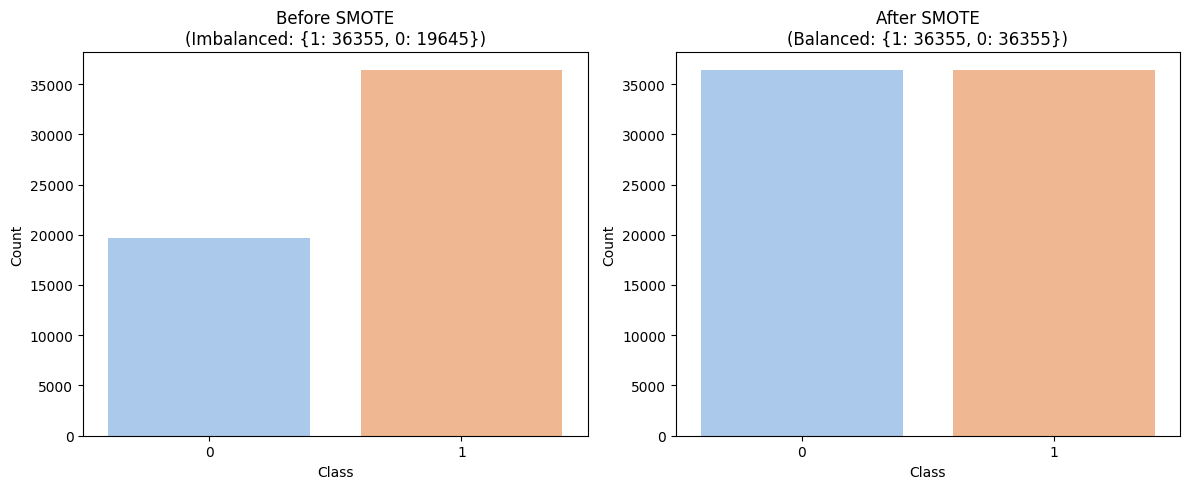

อัปเดตตัวแปร X_train, y_train เป็นแบบ SMOTE เรียบร้อย พร้อมเทรน!


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# โหลดและแยกข้อมูลใหม่ (เพื่อให้ได้ y_train ตัวเก่าที่ยังไม่สมดุลกลับมา)
data = pd.read_csv('/content/stroke_risk_dataset.csv')
y = data['At Risk (Binary)']
X = data.drop(['At Risk (Binary)', 'Stroke Risk (%)'], axis=1)

# แบ่ง Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- วาดกราฟ ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# กราฟซ้าย: ใช้ y_train (ตัวเก่า ที่ยังไม่ทำ SMOTE)
sns.countplot(x=y_train, ax=axes[0], palette='pastel')
axes[0].set_title(f'Before SMOTE\n(Imbalanced: {y_train.value_counts().to_dict()})')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# --- ทำ SMOTE ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# กราฟขวา: ใช้ y_train_resampled (ตัวใหม่)
sns.countplot(x=y_train_resampled, ax=axes[1], palette='pastel')
axes[1].set_title(f'After SMOTE\n(Balanced: {y_train_resampled.value_counts().to_dict()})')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

X_train = X_train_resampled
y_train = y_train_resampled
print("อัปเดตตัวแปร X_train, y_train เป็นแบบ SMOTE เรียบร้อย พร้อมเทรน!")

#Test Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


#🌲 Model 1: Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
#เทรนด้วยข้อมูลที่ทำ SMOTE แล้ว (แต่ไม่ต้อง Scaled ก็ได้สำหรับ RF)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

# ⚙️ Model 2: Support Vector Machine (SVM)

In [ ]:
svm_model = SVC(random_state=42)

In [ ]:
# เทรนด้วยข้อมูลที่ Scaled + SMOTE แล้ว (SVM จำเป็นต้อง Scale!)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
y_pred_svm = svm_model.predict(X_test_scaled)

# 📊 แสดงผลลัพธ์ (Evaluation)

In [ ]:
print("\n--- 🏆 สรุปผลการเปรียบเทียบโมเดล ---")
def evaluate_model(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n>> {model_name}")
    print(f"   Accuracy: {acc:.2%}") # แสดงเป็น %
    print("   Classification Report:")
    print(classification_report(y_true, y_pred))
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("SVM", y_test, y_pred_svm)



--- 🏆 สรุปผลการเปรียบเทียบโมเดล ---

>> Random Forest
   Accuracy: 95.09%
   Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4911
           1       0.96      0.96      0.96      9089

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000


>> SVM
   Accuracy: 99.22%
   Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4911
           1       0.99      1.00      0.99      9089

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

print("--- ตาราง Confusion Matrix เปรียบเทียบ (RF vs SVM) ---")

# 1. ทำนายผล (Prediction)
# RF: ใช้ X_test ปกติ
y_pred_rf = rf_model.predict(X_test)

# SVM: ต้องใช้ X_test_scaled (ข้อมูลที่ปรับสเกลแล้ว)
y_pred_svm = svm_model.predict(X_test_scaled)

# 2. สร้างตาราง Confusion Matrix (DataFrame)

# --- ตารางของ Random Forest ---
cm_rf = confusion_matrix(y_test, y_pred_rf)
df_cm_rf = pd.DataFrame(
    cm_rf,
    columns=['Pred: Normal (0)', 'Pred: Risk (1)'],
    index=['Actual: Normal (0)', 'Actual: Risk (1)']
)

# --- ตารางของ SVM ---
cm_svm = confusion_matrix(y_test, y_pred_svm)
df_cm_svm = pd.DataFrame(
    cm_svm,
    columns=['Pred: Normal (0)', 'Pred: Risk (1)'],
    index=['Actual: Normal (0)', 'Actual: Risk (1)']
)

# 3. แสดงผลเปรียบเทียบ
print("\n🔹 1. Random Forest Confusion Matrix:")
print(df_cm_rf)
print("-" * 50)

print("\n🔹 2. SVM Confusion Matrix:")
print(df_cm_svm)
print("-" * 50)

# 4.คำนวณหา "False Negative" (คนป่วยที่ทายผิด)
# ช่องซ้ายล่าง (แถว Risk, คอลัมน์ Normal)
fn_rf = df_cm_rf.iloc[1, 0]
fn_svm = df_cm_svm.iloc[1, 0]

print("\n⚠️ วิเคราะห์ความปลอดภัย (Safety Check):")
print(f"- RF พลาดคนป่วยไป: {fn_rf} คน")
print(f"- SVM พลาดคนป่วยไป: {fn_svm} คน")

if fn_svm < fn_rf:
    print("สรุป: SVM ปลอดภัยกว่า เพราะพลาดน้อยกว่า")
else:
    print("สรุป: RF ปลอดภัยกว่า เพราะพลาดน้อยกว่า")

--- ตาราง Confusion Matrix เปรียบเทียบ (RF vs SVM) ---

🔹 1. Random Forest Confusion Matrix:
                    Pred: Normal (0)  Pred: Risk (1)
Actual: Normal (0)              4586             325
Actual: Risk (1)                 362            8727
--------------------------------------------------

🔹 2. SVM Confusion Matrix:
                    Pred: Normal (0)  Pred: Risk (1)
Actual: Normal (0)              4843              68
Actual: Risk (1)                  41            9048
--------------------------------------------------

⚠️ วิเคราะห์ความปลอดภัย (Safety Check):
- RF พลาดคนป่วยไป: 362 คน
- SVM พลาดคนป่วยไป: 41 คน
สรุป: SVM ปลอดภัยกว่า เพราะพลาดน้อยกว่า


--- กราฟ Confusion Matrix เปรียบเทียบ ---


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from font(s) DejaVu Sans.
  fig.canvas.d

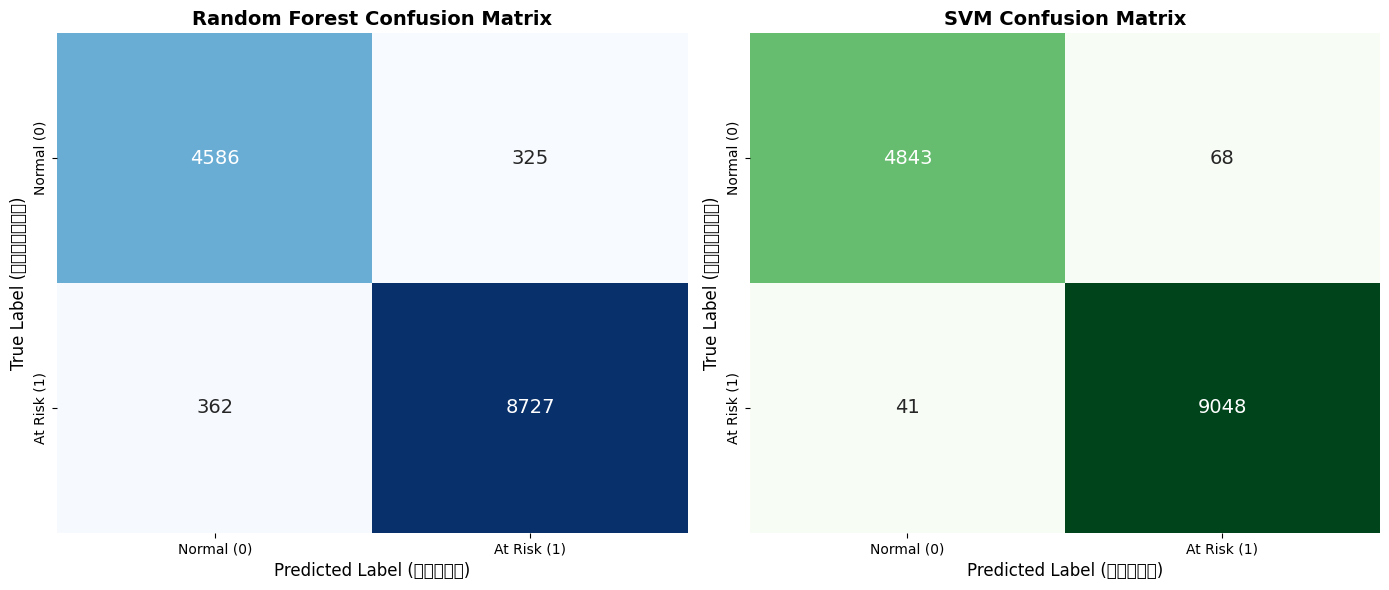

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("--- กราฟ Confusion Matrix เปรียบเทียบ ---")

#1.ทำนายผลก่อน
y_pred_rf = rf_model.predict(X_test)           # RF ใช้ X_test ปกติ
y_pred_svm = svm_model.predict(X_test_scaled)  # SVM ใช้ X_test_scaled

#2.เตรียมพื้นที่วาดกราฟ 2 ช่อง
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- กราฟที่ 1: Random Forest  ---
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False, annot_kws={"size": 14})
axes[0].set_title('Random Forest Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Label (ทำนาย)', fontsize=12)
axes[0].set_ylabel('True Label (ของจริง)', fontsize=12)
axes[0].set_xticklabels(['Normal (0)', 'At Risk (1)'])
axes[0].set_yticklabels(['Normal (0)', 'At Risk (1)'])

# --- กราฟที่ 2: SVM  ---
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=False, annot_kws={"size": 14})
axes[1].set_title('SVM Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Label (ทำนาย)', fontsize=12)
axes[1].set_ylabel('True Label (ของจริง)', fontsize=12)
axes[1].set_xticklabels(['Normal (0)', 'At Risk (1)'])
axes[1].set_yticklabels(['Normal (0)', 'At Risk (1)'])

plt.tight_layout()
plt.show()

--- วิเคราะห์ความสำคัญของตัวแปร (Feature Importance) ---

5 ปัจจัยเสี่ยงที่สำคัญที่สุด:
Age                   0.505685
Cold Hands/Feet       0.034423
Persistent Cough      0.033760
Fatigue & Weakness    0.033482
Excessive Sweating    0.033357
dtype: float64


/tmp/ipython-input-2103611569.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3649 (\N{THAI

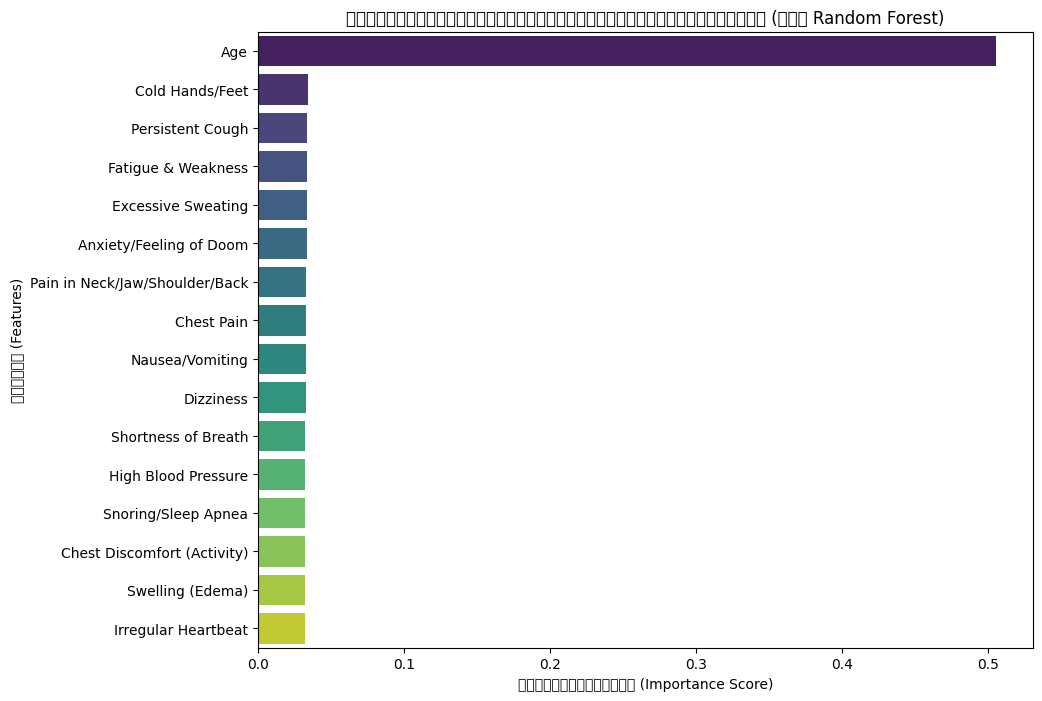

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- วิเคราะห์ความสำคัญของตัวแปร (Feature Importance) ---")

# 1.ดึงค่าความสำคัญจาก Random Forest
feature_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# 2.Top 5 อันดับแรก
print("\n5 ปัจจัยเสี่ยงที่สำคัญที่สุด:")
print(feature_imp.head(5))

# 3.สร้างกราฟแท่ง (Bar Plot)
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis')

plt.xlabel('คะแนนความสำคัญ (Importance Score)')
plt.ylabel('ตัวแปร (Features)')
plt.title('ปัจจัยที่มีผลต่อความเสี่ยงโรคหลอดเลือดสมอง (จาก Random Forest)')
plt.show()

--- วิเคราะห์ความสำคัญของตัวแปร (SVM Feature Importance) ---

5 ปัจจัยเสี่ยงที่สำคัญที่สุด (สำหรับ SVM):
Age                        0.333071
Snoring/Sleep Apnea        0.058979
Cold Hands/Feet            0.058243
Irregular Heartbeat        0.058014
Anxiety/Feeling of Doom    0.057936
dtype: float64


/tmp/ipython-input-2711448912.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=svm_importances, y=svm_importances.index, palette='magma')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3649 (\

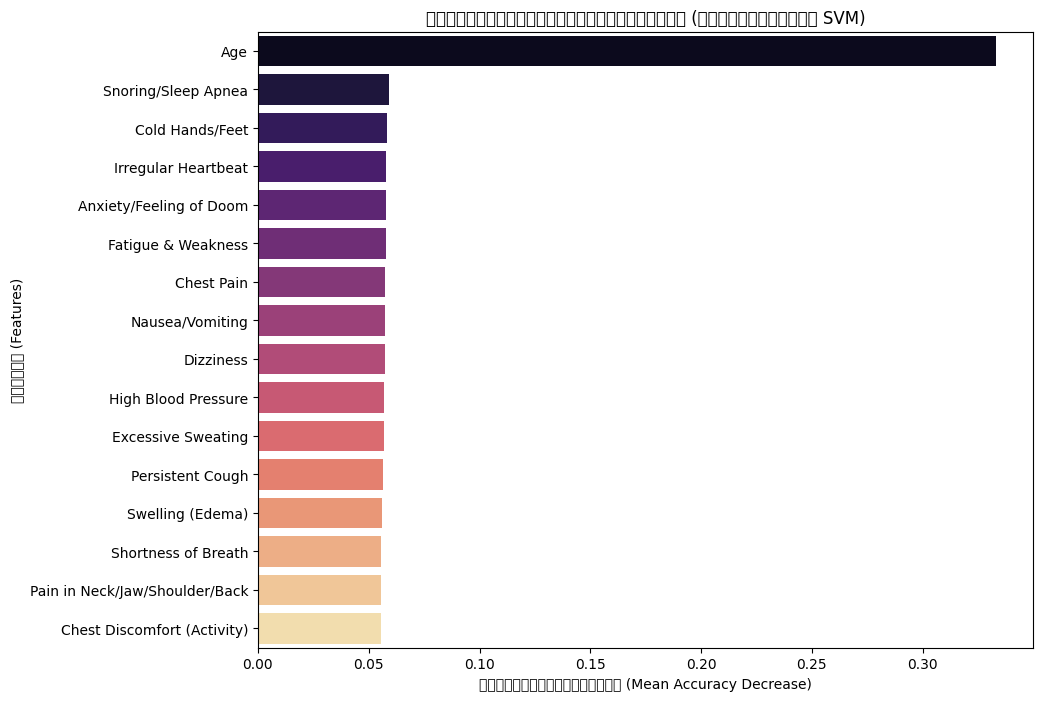

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("--- วิเคราะห์ความสำคัญของตัวแปร (SVM Feature Importance) ---")

# 1.คำนวณ Permutation Importance
# เราต้องใช้ X_test_scaled เพราะ SVM เทรนมาแบบ Scaled
result = permutation_importance(
    svm_model, X_test_scaled, y_test,
    n_repeats=10,       #ทำซ้ำ 10 รอบเพื่อความชัวร์
    random_state=42,
    n_jobs=-1
)

# 2.ดึงค่าความสำคัญออกมา
# importances_mean คือค่าเฉลี่ยว่าความแม่นยำลดลงไปเท่าไหร่
svm_importances = pd.Series(result.importances_mean, index=X_test.columns).sort_values(ascending=False)

# 3.แสดงผล 5 อันดับแรก
print("\n5 ปัจจัยเสี่ยงที่สำคัญที่สุด (สำหรับ SVM):")
print(svm_importances.head(5))

# 4.สร้างกราฟ
plt.figure(figsize=(10, 8))
sns.barplot(x=svm_importances, y=svm_importances.index, palette='magma')

plt.xlabel('ความแม่นยำที่ลดลง (Mean Accuracy Decrease)')
plt.ylabel('ตัวแปร (Features)')
plt.title('ปัจจัยที่มีผลต่อความเสี่ยง (วิเคราะห์จาก SVM)')
plt.show()

--- 🎨 สร้างภาพจำลอง Decision Boundary ของ SVM ---


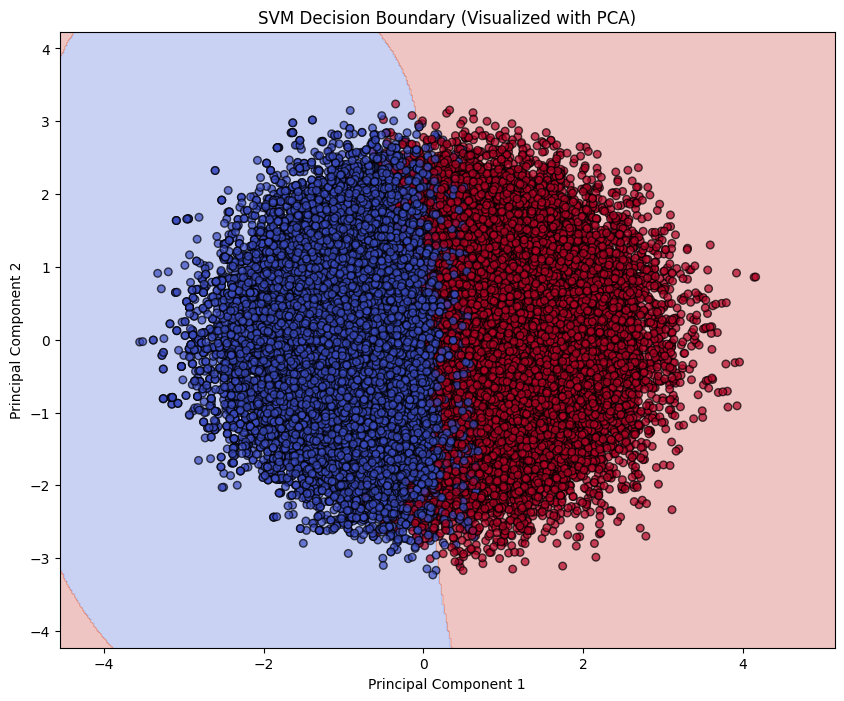

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC

print("--- สร้างภาพจำลอง Decision Boundary ของ SVM ---")

#1.ย่อข้อมูลเหลือ 2 มิติ (PCA)
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_train_scaled) #ใช้ข้อมูล Scaled

#2.เทรน SVM เพื่อวาดกราฟนี้โดยเฉพาะ
svm_vis = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_vis.fit(X_vis, y_train)

#3.สร้างตารางจุดระบายสี
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

#4.ทำนายพื้นที่
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#5.วาดกราฟ
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm) # พื้นหลัง
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', s=30, alpha=0.7) # จุดข้อมูลจริง

plt.title('SVM Decision Boundary (Visualized with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()